In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import h5py
import seaborn
import numpy as np
import os
import tensorflow as tf
from sklearn.metrics import pairwise_distances
import sys
sys.path.append("../")
from utils import l2_normalize, prewhiten, read_sampled_identities, plot_recall, recall_given_dist, plot_topk
from PIL import Image
seaborn.set()


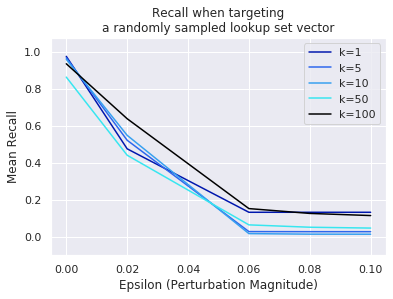

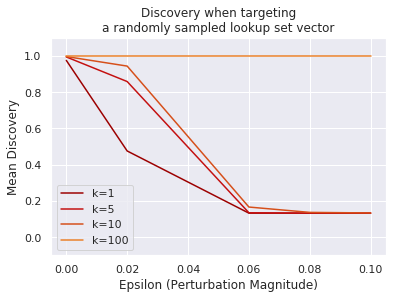

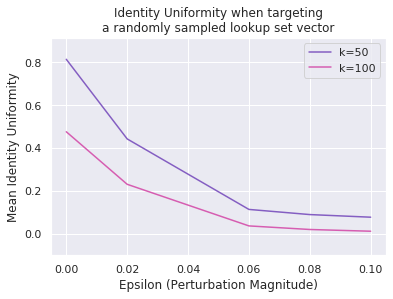

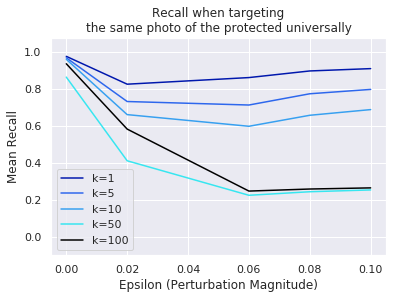

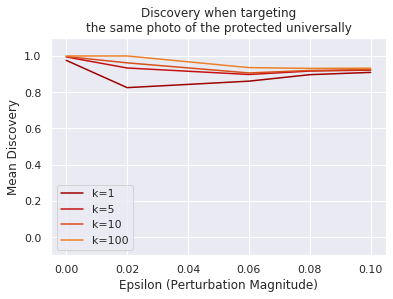

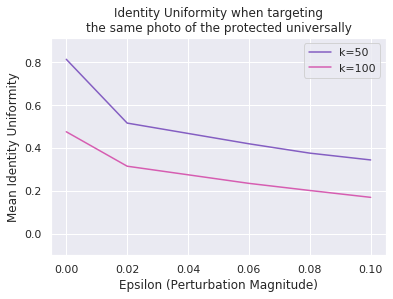

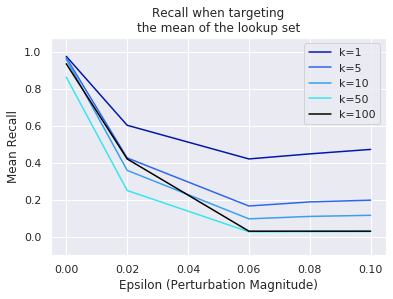

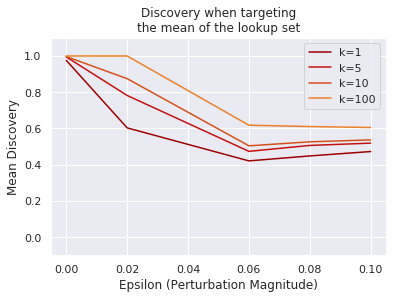

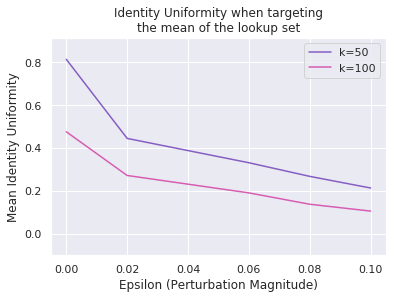

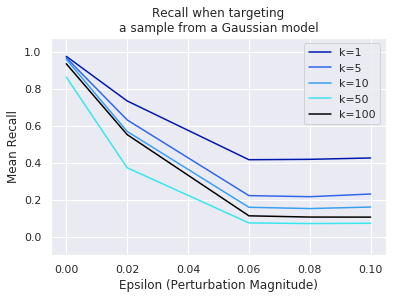

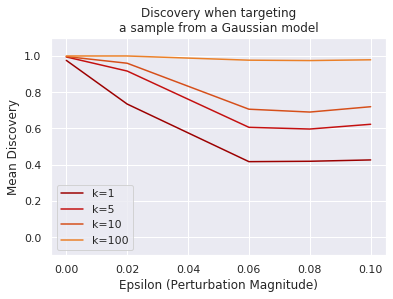

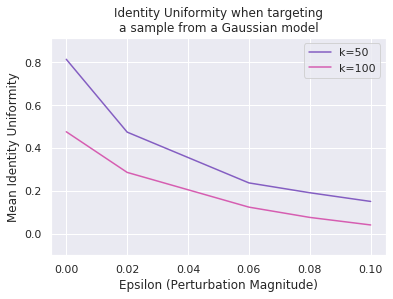

In [3]:
mode2ks = {
    "recall": [1, 5, 10, 50, 100],
    "discovery": [1, 5, 10, 100],
    "numids": [50, 100],
}
mode2colors = {
    "recall": ['#0017ad', '#2d67ed', '#37a0f0', '#37e6f0','#000000'],
    "discovery": ['#9c0000', '#c41010','#d64f1a','#eb8028'],
    "numids": ['#845ec2', '#d65db1', '#ff6f91', '#ff9671', '#ffc75f', '#f9f871']
}
attack2display = {
    "community_naive_random": "a randomly sampled lookup set vector",
    "community_naive_same": "the same photo of the protected universally",
    "community_naive_mean": "the mean of the lookup set",
    "community_sample_gaussian_model": "a sample from a Gaussian model"
}
mode2display = {
    "recall": "Recall",
    "discovery": "Discovery",
    "numids": "Identity Uniformity"
}
for attack_name in [
    "community_naive_random", 
    "community_naive_same",
    "community_naive_mean",
    "community_sample_gaussian_model"
    
]:
    for mode in ["recall", "discovery", "numids"]:
        kwargs = {
            "attack_name": attack_name,
            "path_to_adversarial": "/data/vggface/test_perturbed_sampled/{true}/" + attack_name + "/{target}/epsilon_{epsilon}.h5",
            "path_to_clean": "/data/vggface/test_preprocessed_sampled/{id}/embeddings.h5",
            "epsilons": [0.0, 0.02, 0.06, 0.08, 0.1],
            "identities": read_sampled_identities("../sampled_identities.txt").keys(),
            "save_base": "/home/ivan/pascal_adversarial_faces/figures"
        }
        plot_recall(
            ks=mode2ks[mode],
            colors=mode2colors[mode],
            mode=mode,
            attack_plot_name="{} when targeting\n{}".format(
                mode2display[mode],
                attack2display[attack_name]
            ),
            metric_name=mode2display[mode],
            **kwargs
        )
    